In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_colwidth', -1)

# Load Sizo Lines

In [3]:
import numpy as np
import pandas as pd
import os

base_dir = 'D:/Data'
excel_file = 'N68_2.xlsx'
excel_dir = os.path.join(base_dir, excel_file)

lines_df = pd.read_excel(excel_dir, encoding = 'ISO-8859-1',
                              sheet_name = 'Sheet1', 
                              header = 0, 
                              names = ['LineNumber','Text','Line_Num','Line', 'Pattern','Value'], 
                              dtype = { 'LineNumber': str, 
                                        'Line_Num': np.int64, 
                                        'Text': str, 
                                        'Line': str, 
                                        'Pattern': str, 
                                        'Value': np.int64 
                                       }, 
                              index_col = 'LineNumber', 
                              na_values = 'NaN', 
                              comment = '#')
lines_df

,Text,Line_Num,Line,Pattern,Value
LineNumber,,,,,
L10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,1,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱㅏㅇㅅㅏㄴㅇㅡㄹㅗ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ,NaN,1
L10019081,어듸야  소 모라 가는 노랑 듸궁이 더벙 머리,1,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓㅂㅓㅇ ㅁㅓㄹㅣ,NaN,1
L10022821,이년아 말 듯거라 굽고 나마 쟈질년아,1,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,NaN,1
L10006771,눈아눈아 머르칠 눈아 두 손 장가락으로  질너 머르칠 눈아,1,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺㅗㄱ ㅈㅣㄹㄴㅓ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ,NaN,1
L10007731,아 은 아 李太白이 노든 아,1,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,NaN,1
...,...,...,...,...,...
L10022011,우정워정며 歲月이 거의로다,1,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,NaN,0
L10022361,渭城官 柳樹를 처음의 심근 은,1,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,NaN,0
L10022711,銀河에 물이 지니 烏鵲橋 단말가,1,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,NaN,0


In [4]:
len(lines_df)

136

In [5]:
lines_df.nunique()

Text        136
Line_Num    1  
Line        135
Pattern     0  
Value       2  
dtype: int64

# Fn1 : to_word_chunk

In [6]:
# 함수 : New Syllable centered word chunks(1개의 문장으로 만듦) - Train 용
# rule 1 : vowel + Blank("B로 표시") - 하나의 문장으로 만들기 위해 빈칸 더해 줌
# rule 2 : 2-5개 음절 chunk

def to_word_chunk(text_list): 
    test_list_new = []
    for each_item in text_list:
        each_list = each_item.split() 
        d=[]
        e =""    
        for each_word in each_list:
            if len(each_word)/3 < 1.7:
                e+=each_word[:-2]+" "
                e+=each_word[-2:]+"B "           
            
            elif len(each_word)/3 >= 1.7 and  len(each_word)/3 < 3:
                e+=each_word[:2]+" "
                e+=each_word[2:-2]+" "
                e+=each_word[-2:]+"B "            
            elif len(each_word)/3 >=3 and len(each_word)/3 <5:
                e+=each_word[:2]+" "
                e+=each_word[2:-4]+" "       
                e+=each_word[-4:-2]+" "
                e+=each_word[-2:]+"B "            
            elif len(each_word)/3 >=5 and len(each_word)/3 <8:
                e+=each_word[:2]+" "
                e+=each_word[2:6]+" "        
                e+=each_word[6:-2]+" "
                e+=each_word[-2:]+"B "                       
            elif len(each_word)/3 >=8 and len(each_word)/3 <11:
                e+=each_word[:2]+" "
                e+=each_word[2:6]+" "  
                e+=each_word[6:12]+" "
                e+=each_word[12:19]+" "
                e+=each_word[19:-2]+" "
                e+=each_word[-2:]+"B "            
            else: 
                e+=each_word[:2]+" "
                e+=each_word[2:6]+" "    
                e+=each_word[6:12]+" "
                e+=each_word[12:19]+" "
                e+=each_word[19:22]+" "
                e+=each_word[22:26]+" "
                e+=each_word[26:-2]+" "
                e+=each_word[-2:]+"B "
        test_list_new.append(e)
    return test_list_new

In [7]:
text = lines_df.iloc[:,2].values.tolist() 
chunked_text = to_word_chunk(text)

In [8]:
lines_df["chunked_text"] = chunked_text

In [9]:
lines_df

,Text,Line_Num,Line,Pattern,Value,chunked_text
LineNumber,,,,,,
L10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,1,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱㅏㅇㅅㅏㄴㅇㅡㄹㅗ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ,NaN,1,ㄱㅏ ㄴㅗ ㄹㅏB ㄱㅏ ㄴㅗ ㄹㅏB ㅇㅣㅁ ㅇㅏB ㅇㅓ ㄴㅇ ㅑㅇB ㄷㅏ ㄴㅊㅓ ㄴㅇ ㅡㅣB ㅍㅜ ㅇㅇㅜ ㅓㄹB ㄱㅏ ㅇㅅㅏㄴ ㅇㅡ ㄹㅗB ㄱㅏ ㄴㅗ ㄹㅏB ㅇㅣㅁ ㅇㅏB
L10019081,어듸야  소 모라 가는 노랑 듸궁이 더벙 머리,1,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓㅂㅓㅇ ㅁㅓㄹㅣ,NaN,1,ㅇㅓ ㄷㅡㅣ ㅇㅑB ㅺㅣ ㄹㅺ ㅣㄹB ㅅㅗB ㅁㅗ ㄹㅏB ㄱㅏㄴ ㅡㄴB ㄴㅗㄹ ㅏㅇB ㄷㅡ ㅣㄱㅜㅇ ㅇㅣB ㄷㅓㅂ ㅓㅇB ㅁㅓ ㄹㅣB
L10022821,이년아 말 듯거라 굽고 나마 쟈질년아,1,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,NaN,1,ㅇㅣ ㄴㅕㄴ ㅇㅏB ㅁ ㅏㄹB ㄷㅡ ㅅㄱㅓ ㄹㅏB ㄱㅜㅂ ㄱㅗB ㄴㅏ ㅁㅏB ㅈㅑ ㅈㅣㄹㄴ ㅕㄴ ㅇㅏB
L10006771,눈아눈아 머르칠 눈아 두 손 장가락으로  질너 머르칠 눈아,1,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺㅗㄱ ㅈㅣㄹㄴㅓ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ,NaN,1,ㄴㅜ ㄴㅇㅏㄴ ㅜㄴ ㅇㅏB ㅁㅓ ㄹㅡㅊ ㅣㄹB ㄴㅜㄴ ㅇㅏB ㄷㅜB ㅅ ㅗㄴB ㅈㅏ ㅇㄱㅏㄹㅏㄱ ㅇㅡ ㄹㅗB ㅺ ㅗㄱB ㅈㅣㄹ ㄴㅓB ㅁㅓ ㄹㅡㅊ ㅣㄹB ㄴㅜㄴ ㅇㅏB
L10007731,아 은 아 李太白이 노든 아,1,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,NaN,1,ㄷㆍㄹ ㅇㅏB ㅂㆍ ᇃㅇ ㅡㄴB ㄷㆍㄹ ㅇㅏB ㅇㅣ ㅌㅐㅂ ㅐㄱ ㅇㅣB ㄴㅗㄷ ㅡㄴB ㄷㆍㄹ ㅇㅏB
...,...,...,...,...,...,...
L10022011,우정워정며 歲月이 거의로다,1,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,NaN,0,ㅇㅜ ㅈㅓㅇㅇ ㅜㅓㅈㅓㅇㅎㆍ ㅁㅕB ㅅㅔ ㅇㅜㅓㄹ ㅇㅣB ㄱㅓ ㅇㅡㅣ ㄹㅗ ㄷㅏB
L10022361,渭城官 柳樹를 처음의 심근 은,1,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,NaN,0,ㅇㅜ ㅣㅅㅓㅇ ㄱㅗ ㅏㄴB ㅇㅠ ㅅㅜㄹ ㅡㄹB ㅊㅓ ㅇㅡㅁㅇ ㅡㅣB ㅅㅣ ㅁㄱ ㅡㄴB ㅼㅡㅇ ㅡㄴB
L10022711,銀河에 물이 지니 烏鵲橋 단말가,1,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,NaN,0,ㅇㅡ ㄴㅎㅏ ㅇㅔB ㅁㅜㄹ ㅇㅣB ㅈㅣ ㄴㅣB ㅇㅗ ㅈㅏㄱ ㄱㅛB ㅼㅡ ㄷㅏㄴㅁ ㅏㄹ ㄱㅏB


In [10]:
lines_df_small = lines_df.head(130)

In [11]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

def text_to_tokens(text):
    text = text.lower()
    text = remove_stopwords(text)
    tokens = simple_preprocess(text)
    return tokens

In [12]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [13]:
documents_dataset = DocumentDataset(lines_df_small, 'chunked_text')

# Document Vector Model 적용

In [14]:
docVecModel = Doc2Vec(min_count=3, window=10, vector_size=50, sample=1e-4, negative=2, workers=8) #sample=1e-4,
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [15]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=1000)

In [16]:
docVecModel.corpus_count

130

In [17]:
docVecModel.save('../data/SizoChunkedLinesModel.d2v')

In [18]:
docVecModel = Doc2Vec.load('../data/SizoChunkedLinesModel.d2v')

In [20]:
docVecModel['L10007731']

array([-0.08874116, -0.01102531, -0.12691852, -0.16775268,  0.06631801,
        0.07212813, -0.12082723,  0.09758611, -0.14671516,  0.1206121 ,
        0.11714982,  0.27471316, -0.06195598,  0.04137366, -0.02586757,
        0.1265664 ,  0.07194417, -0.07940786, -0.08936572,  0.01166478,
       -0.03395585, -0.08541073, -0.12977447,  0.07255173,  0.15387377,
       -0.07978975,  0.15569013,  0.1848203 , -0.13176674, -0.23058985,
        0.05339517,  0.02183436,  0.18888526, -0.08454058, -0.03921777,
        0.12681952, -0.13782306,  0.09428693, -0.1575063 ,  0.23127954,
       -0.37632665,  0.06471734,  0.03936909,  0.08192208,  0.03068812,
       -0.13277143, -0.20689715, -0.02357344,  0.03814089, -0.06602477],
      dtype=float32)

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False, 
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
    
def show_movie_line(line_number):
    line = lines_df_small.loc[line_number].chunked_text  #lines_df_small.ix[line_number].Line 
    Text = lines_df_small.loc[line_number].Text
    doc_vector = docVecModel.docvecs[line_number]
    show_image(doc_vector, Text) #line
    

아 은 아 李太白이 노든 아


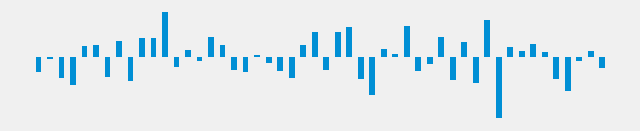

In [22]:
show_movie_line('L10007731')

In [23]:
docVecModel.docvecs.most_similar('L10007731')

[('L10005431', 0.8191916942596436),
 ('L10032741', 0.8065859079360962),
 ('L10009821', 0.7942101359367371),
 ('L10001801', 0.7935289740562439),
 ('L10016651', 0.7900261282920837),
 ('L10013601', 0.7846131920814514),
 ('L10022821', 0.7825129628181458),
 ('L10016591', 0.7812583446502686),
 ('L10006771', 0.7754442095756531),
 ('L10013281', 0.7752472758293152)]

섭시른 千里馬를 알아 볼 이 뉘 잇시리


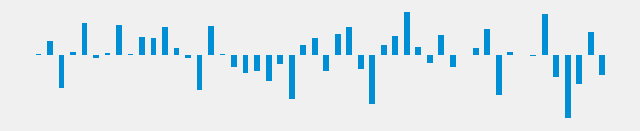

In [24]:
show_movie_line('L10015921')

In [25]:
docVecModel['L10019151']

array([ 0.03597284,  0.0126755 , -0.00742718, -0.0023227 ,  0.02333968,
       -0.00602289, -0.04169352,  0.02051531,  0.03401949, -0.00382624,
        0.00049167,  0.03916926,  0.0342214 ,  0.02861368, -0.00359089,
        0.03409337,  0.01775055, -0.02220078, -0.02404488,  0.01978154,
       -0.05534292,  0.03447651, -0.03641912, -0.006731  ,  0.00096406,
        0.0097194 , -0.0094067 , -0.01273003, -0.0075861 , -0.06164571,
        0.0130432 ,  0.04533255,  0.02002482, -0.01849805,  0.01026782,
        0.0409897 ,  0.01052407,  0.00333915, -0.02479685,  0.03413994,
       -0.04050222,  0.01905057,  0.01808671,  0.01597623,  0.01753622,
        0.01012772, -0.06808248, -0.00845405,  0.01091228, -0.00157498],
      dtype=float32)

In [26]:
def to_vector(sentence):
    cleaned = preprocess_string(sentence)
    docVector = docVecModel.infer_vector(cleaned)
    return docVector

아 은 아 李太白이 노든 아


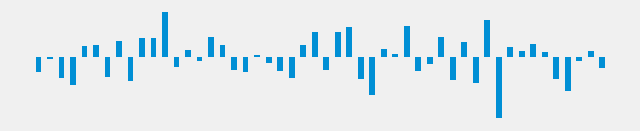

In [27]:
show_movie_line('L10007731')

ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ


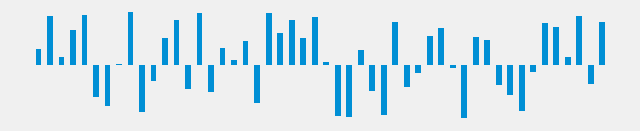

In [28]:
line = "ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ"
show_image(to_vector("ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ"), line)

In [29]:
def similar_movie_lines(sentence):
    vector = to_vector(sentence)
    similar_vectors = docVecModel.docvecs.most_similar(positive=[vector])
    similar_lines = [ lines_df.loc[line[0]].chunked_text for line in similar_vectors]
    return similar_lines

similar_movie_lines("ㄱㅗㅇㅅㅏㄴㅍㅜㅇㅇㅜㄴㅇㅑㅇㅔ ㄷㅗㄹㅏㅇㅗㄴㅡㄴ ㅈㅕ ㅅㆍㄹㆍㅁㅇㅏ")

['ㄴㅏ ㄱㅇ ㅑㅇB ㅇㅑ ㅅㅌ ㅡㄴB ㅁㅜㄹ ㅇㅔB ㅇ ㅕㄴB ㅋㆎㄴ ㅡㄴB ㅇㅏ ㅎㅡㅣㄷ ㅡㄹ ㅇㅏB ',
 'ㅂㅕ ㄱㄱㅖ ㅅㅜB ㅇㅑ ㅇㄹㅠㅈ ㅓㅇ ㅇㅔB ㅈㅏ ㅍㅗㅎ ㆍㄴB ㅇㅕ ㅇㅈㅜㄱ ㅐㄱ ㅇㅣB ',
 'ㄷㆍㄹ ㅇㅏB ㅂㆍ ᇃㅇ ㅡㄴB ㄷㆍㄹ ㅇㅏB ㅇㅣ ㅌㅐㅂ ㅐㄱ ㅇㅣB ㄴㅗㄷ ㅡㄴB ㄷㆍㄹ ㅇㅏB ',
 'ㅅㅏ ㄴㅈㅓㄴ ㅇㅔB ㅇㅠ ㄷㅐㅎㆍ ㄱㅗB ㄷㅐ ㅎㅏ ㅇㅐB ㅇㅠ ㅅㅜㅣ ㄹㅗ ㄷㅏB ',
 'ㅅㅓ ㄱㅅㅏㅇ ㅇㅔB ㅈㅏ ㅇㅗㄷ ㅗㅇB ㅅㅓ ㄱㅈㆍㅁ ㅏㄴB ㅂㅓ ㅎㅕㄴ ㆎㅁ ㅕㄴB ',
 'ㅇㅏ ㅎㅡㅣ ㅇㅏB ㄱㅜ ㄹㅓㄱㅁ ㅏㅇ ㅌㆎB ㅇㅓ ㄷㅓB ㅅㅓ ㅅㅏㄴ ㅇㅔB ㄴ ㅏㄹB ㄴㅡ ㅅㄱㅓ ㄷㅏB ',
 'ㄴㅜ ㄴㅇㅏㄴ ㅜㄴ ㅇㅏB ㅁㅓ ㄹㅡㅊ ㅣㄹB ㄴㅜㄴ ㅇㅏB  ㄷㅜB ㅅ ㅗㄴB ㅈㅏ ㅇㄱㅏㄹㅏㄱ ㅇㅡ ㄹㅗB ㅺ ㅗㄱB ㅈㅣㄹ ㄴㅓB ㅁㅓ ㄹㅡㅊ ㅣㄹB ㄴㅜㄴ ㅇㅏB ',
 'ㄱㅗㅅ ㅗㅇB ㄱㅣㅅ ㅓㄱB  ㄷㅜB ㅅㅏ ㅇㅣ ㅇㅖB ㅇㅓ ㅇㅕㅅㅂㅜ ㄹㅅ ㅡㄴB  ㅈㅕB ㄷㅜ ㄱㅕㄴ ㅇㅏB ',
 'ㅂㅐ ㄱㅅㅓㄹ ㅇㅣB ㅈㆍ ㅈㆍㅈ ㅣㄴB ㄱㅗㄹ ㅇㅔB ㄱㅜ ㄹㅜㅁ ㅇㅣB ㅁㅓ ㅎㅡㄹㅔ ㄹㅏB ',
 'ㅇㅓ ㄹㅡㄴ ㅈㅑB ㄴㅓ ㅊㅜㄹㅣ ㅇㅑB ㅇㅔ ㅇㅓㄹ ㅡㄴ ㅈㅑB ㅂㅏ ㄱㄴㅓㅊㅜ ㄹㅣ ㅇㅑB ']

In [30]:
lines_df_small.loc['L10007731'].Text

'\ue38f아 \ue650은 \ue38f아 李太白이 노든 \ue38f아'